<a href="https://colab.research.google.com/github/manudwd/Classification--preprocessing-data-/blob/main/NN_regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import tensorflow as tf
import numpy as np 


In [ ]:
import tensorflow as tf



creating data to view and fit

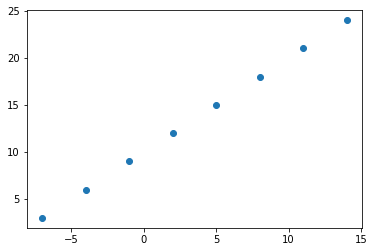

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
#create some features
X=np.array([-7.0,-4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create some labels labels are marked by lower case letters
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#plot the data 
plt.scatter(X,y) #for scatter plot


In [ ]:
y==X+10 #is the relationship we're trying to establish between the features and the labels



array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and ouput shapes



```
# This is formatted as code
```

So heres the thing, understanding data and how you're going to implment is equally important. Here we only need a single value of X to predict y value at that coordinate.

Thus the single value of this numpy array, is scalar value, which ahs  a dimension of 0

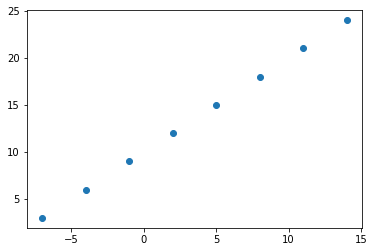

In [ ]:
#converting the numpy array into a tensor while changing dtype
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

inputshape=X[0].shape
outputshape=y[0].shape
inputshape, outputshape

plt.scatter(X,y)

# Steps to modeeling in tensor flow
1. Creating a model to define input and outputs and hidden layeres of the deep learning model.
2. Compiling model-define the loss function(essentially how wrong our model is) and the optimizer(tell our model how to improve its performace) and the evaluation matrix (aka hwo to interpret the model)
3.Fitting a mdoel-letting th model try to find patterns between X &y (features and labels)

you can use model.add to add layers as well as 
the method below, point is that tehre are mutiple ways to do hte same thing 
in tensor flow


In [ ]:
#setting the random seed
tf.random.set_seed(42)

#1 create the model using seqeuntial API 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])


 #Sequential provides training and inference features
#here we have added them in a list


#the number is 1 because we are taking 1 from feature and comparing it with 1 label
#2. compile the model

#loss is how wrongn your model's prediction are compared to the truth labels
#we attempt to minimise this 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])#metrics is a human interpretable value for 
                              #how well your model is  doing


#alot of the times you if some function like mae has shortcut names
#you can simply use the string value as done in the metrics field
#for example you can simply write optimizer=["SGD"] and it would work


#3 fit the model
model.fit(X,y, epochs=5) 


Epoch 1/5
1/1 [==============================] - 0s 286ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


what this says that we have a lose of 10.9748 at the end when trying to fit our y values for X

In [ ]:
#predicting our model
model.predict([17.0])+10

#our model here doesn't correctly fit the assumptions 
#thus it requires optimization 

 

array([[22.71602]], dtype=float32)

#Improving our NN model

altering how we went through the creation compiling and  fitting stage of the model

1. creating a model- we might add more layers and increase the number of neuron / the hidden layers. and change the activation function of each la yer.
2. Compiling a model- we might change the optimization function or perhaps the learning rate of the optimization funciton
3. We might fit our model for more epochs or on more given data(more modells or examples of data to learn from)



In [ ]:
#we might start with a smaller model and move into a larger model

#create the mode
model=tf.keras.Sequential([
                     tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
           optimizer=tf.keras.optimizers.SGD(),
           metrics=["mae"])

#3.fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 259ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 7m

#1Here we see that by changing a single hyperparameter we changed the mae to aprox 7

In [ ]:
#predicting the data
model.predict([17.0])


array([[29.739855]], dtype=float32)

In [ ]:
#now lets try to change further parameters in our NN

#create the model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100, activation=None ),
                           tf.keras.layers.Dense(1)
])
#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 293ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5402 - mae: 11.5402
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0604 - mae: 11.0604
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5690 - mae: 10.5690
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0635 - mae: 10.0635
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5413 - mae: 9.5413
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.9998 - mae: 8.9998
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4362 - mae: 8.4362
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8475 - mae: 7.8475
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.2898 - mae: 7.2898
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

#now the loss is 3.699 reduced even further

In [ ]:
model.predict([17.0])

array([[29.61856]], dtype=float32)

#here we find out that adding extra layers actually reduced the accuracy of the model, this is in line with the prediction on AxelNet where increasin the number of parameters,accumulators,hidden layers actually decrease the accuracy

We can conclude here that the model is overfitting over the data, and is deriving from previous values too well, ie just relating to what it already knows. so at the end, the error we get isn't a real valid representation of what it is doing. 

So remember that the real efficieny/accuracy we get from our model is not through the training data, but through data it has never seen before

ALSO, decreasing the number of nuerons or the hidden nodes further decays the prediciton values. This is however, as expected


#another important finding is that upon chaning the activation to none, the prediction values improved, thought the mae loss increased

In [ ]:
#lets further try to make changes to the model again
#this time changing the optimizer

#1. create the model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100, activation="relu"),
                           tf.keras.layers.Dense(1)
])
#2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])
#3.fit the mdoel
model.fit(X,y,epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 338ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.7255 - mae: 12.7255
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7171 - mae: 12.7171
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7087 - mae: 12.7087
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.7003 - mae: 12.7003
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6919 - mae: 12.6919
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6834 - mae: 12.6834
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6750 - mae: 12.6750
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6666 - mae: 12.6666
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6582 - mae: 12.6582
Epoch 11/100
1/1 [==============================] - 0s 6

Here we have another weird finding where introducing the adam optimizer with lr=0.0001 actually hindrerd the loss as well

In [ ]:
model.predict([17.0])

array([[4.625799]], dtype=float32)

this shows that all otpimizations isn't good otpimization

In [ ]:
#lets try another model change
#its good practice to keep adding smaller changes to your model to understand 
#what works for model and what doesn't, this practice of incremental change 
#will lead to an overall good model
#lets further try to make changes to the model again
#this time changing the optimizer

#1. create the model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(100, activation="relu"),
                           tf.keras.layers.Dense(1)
])
#2. compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])
#3.fit the mdoel
model.fit(X,y,epochs=100)



Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 13.0842 - mae: 13.0842
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1504 - mae: 12.1504
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1886 - mae: 11.1886
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2381 - mae: 10.2381
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4843 - mae: 9.4843
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7138 - mae: 8.7138
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.9227 - mae: 7.9227
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.1122 - mae: 7.1122
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 6.2750 - mae: 6.2750
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 5.4108 - mae: 5.4108
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

In [ ]:
#chaning the learning rate to 0.01 made the best possible change so far
#with mae=0.16 lets check our predicted values
model.predict([17.0]) 

array([[27.846497]], dtype=float32)

This gave the best possible result for our model so far
#the learning rate is possibly the most important hyperparameter in your NN

In [ ]:
#now lets try fitting more data, ie creating a larger data set
#Or try fitting for even longer

Now let's try evaluating the model
aka how well has it learned the relationships between the features and the labels

In [ ]:
#in practice, a typical work flow is the same as what we just did
#we fit the model and tweak it and evaluate until it fits the desired status

#All you have to do is learn to visualize what your model is doing to evaluate it


We may visualize the data
-the data-what its doing
-the model itself what does it look like
the training of the model-how does it perform while its learns
-prediciton of mode-how the prediction line up with the truth

In [ ]:
#lets now try to mkae a bigger data set

X=tf.range(-100,100,4) #creating no btw -100 and 100 with a step of 4
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#now we make the labels we want our model to learn
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

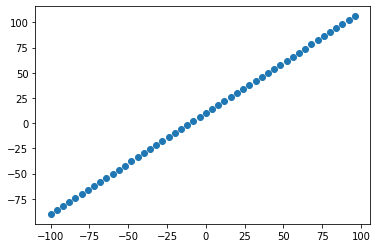

In [ ]:
#now visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

#three sets concept

#basically we split our data into training and test sets
1.training set- the model learns from this data, whihc is typically 70-80% of the total data available.
2. validation set- the model gets tuned from this data, 10-15% of the data 
3. Test set- the model gets evaluated on t his data to test what it has learned this set is typically 10-15% of the total data available

usually we get rid of validation set if we remove

In [ ]:
#check the length of data which we have 
len(X)

50

In [ ]:
#split the data into train and test set
X_train=X[:40] #firstt 40 sets 
y_train=y[:40]
X_test=X[40:] #last 40 sets 20% of the data
y_test=y[40:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

#visualizing  the data
Now we've got the data in training and test set

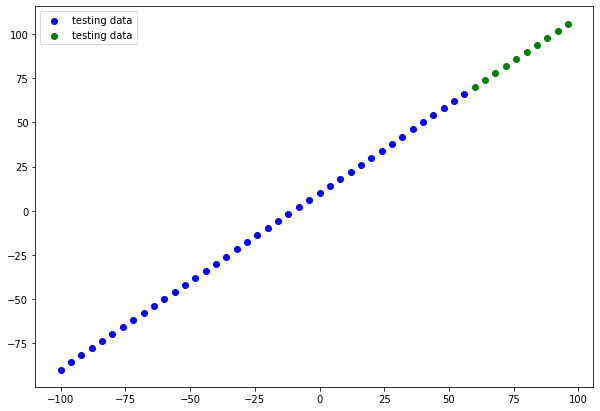

In [ ]:
plt.figure(figsize=(10,7))
#plot training data
plt.scatter(X_train,y_train,c="b",label="testing data")
#plot testing data
plt.scatter(X_test,y_test,c="g",label="testing data")
#show a legend
plt.legend()

In [ ]:
#create the model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1),
                           
])

#compile the model
model.compile(loss=["mae"],
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
#model.fit(X_train,y_train, epochs=100)



We can visualize the model before we even run it

In [ ]:
model.summary()

ValueError: ignored

the model hasn't been built yet, we can define the input_shape in the first layer itself to automatically built the data, or we can use the model.build(shape) to build the data

In [ ]:
#lets build a model that builds automatically
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
                      tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                      tf.keras.layers.Dense(1, name="output_layer")
  #the input shape is 1 because X[0] and y[0] are scalar values, since
  #we are passing only one number we give it a shape 1     
], name="model_1")
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#Dense means fully connected aka all neurons of one layer are connected to the next one

Here we have output shape of 1 with 2 parameters X&y

trainable parameters- are parametres (patterns) the model can update as it trains

sometime when we import an already trained model we may freeze them, in which case they'll appear in the non- trainable params they raen't updated during training nad are used in transfer learning 


#weights and biases
mit introduction to deep learning 

#by chaning your hidden layer you will change the number of params affecting your model



In [ ]:
model_1.fit(X_train,y_train,epochs=100,verbose=0)
#verbose is simply for progress track 0 for silent 1 for progress bar 2 for one line per epoch


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


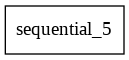

In [ ]:
#here we get to see again that 2 trainable parameters 
#per dense hidden unit
#we can also visualize our model through

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)#converts a keras model to dot format and save to a file
#we can use to_file='file.png' to save it 
#we can use show_shapes=true (false by default)
#also show_layers



#now we have to visualize again at our model's prediction

we visualize predicitons as a plot against the ground truth labels

often we'll see it as y_test vs y_true
or y_pred (ground truth versus your model)


In [ ]:
y_pred=model.predict(X_test)
y_pred

array([[50.16736],
       [53.51185],
       [56.85634],
       [60.20083],
       [63.54532],
       [66.88981],
       [70.2343 ],
       [73.57879],
       [76.92328],
       [80.26778]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

#here we have the values that predict our model

In [ ]:
#lets create the plotting function
#if you feel like you're going to use some functionality in the future
#it's better to make it into a funciton

def plot_prediction(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=y_pred):
  """
  Plot training data,test data, predicitions to the ground truth labels
  """
  plt.figure(figsize=(10,7))
  #plt training data
  plt.scatter(train_data,train_labels,c="b",label="training data")
  #plt test data
  plt.scatter(test_data,test_labels,c="g",label="test data")
  #plot predicitons in red
  plt.scatter(test_data, prediction,c="r",label="predicitons")
  #show the legend
  plt.legend()

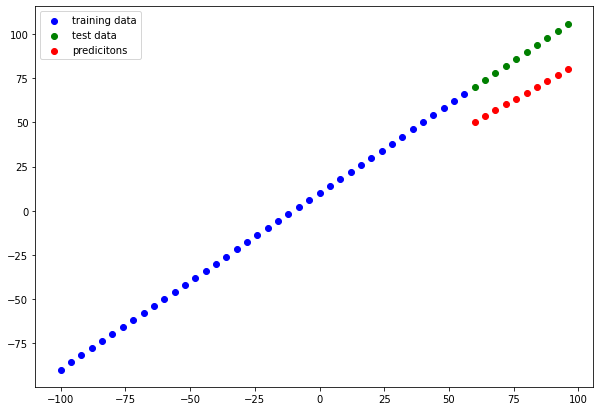

In [ ]:
plot_prediction(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                prediction=y_pred)

###Evaluating the model's prediciton with regression evaluation metrics

Depending on the problem you're wokring on there iwll be diffrenet metrics to evaluate your model's performance 

Since we're working on regression, two of the main metrics:

**MAE(mean absolute error)-ie on average how wrong is each of my models predictions

**MSE-Mean square error where we square errors. use when larger errors are more significant than smaller errors

**Huber- Combination of MSE and MAE less sensitive to outliers than MSE 

In [ ]:
#evaluate the model for test data

model.evaluate(X_test,y_test)
#retunrs the loss value and metrics value for model in the test mode
#remember since we are setting loss=mae the loss value and the mae metric
#value will be the same


1/1 [==============================] - 0s 191ms/step - loss: 22.7824 - mae: 22.7824


[22.78243637084961, 22.78243637084961]

In [ ]:
#calculate the MAE
my_mae=tf.keras.losses.mae(y_true=y_test,y_pred=y_pred)
my_mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([37.83264 , 34.48815 , 31.143661, 27.79917 , 24.454681, 21.110191,
       17.812561, 15.136969, 13.046033, 11.492889], dtype=float32)>

#here we are getting these said values because when converted to tensors you can see that y_pred and y_true don't have the same shape, and thus require reshaping

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[50.16736],
       [53.51185],
       [56.85634],
       [60.20083],
       [63.54532],
       [66.88981],
       [70.2343 ],
       [73.57879],
       [76.92328],
       [80.26778]], dtype=float32)>

In [ ]:
tf.constant(y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

y_test is of shape 10, while y_pred is of the shape 10,1 and thus they require reshaping

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([50.16736, 53.51185, 56.85634, 60.20083, 63.54532, 66.88981,
       70.2343 , 73.57879, 76.92328, 80.26778], dtype=float32)>

In [ ]:
#calculate mae again
my_mae=tf.keras.losses.mae(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
my_mae
#here we get rthe same value from the evaluate function

<tf.Tensor: shape=(), dtype=float32, numpy=22.782436>

In [ ]:
#now lets calculate mse
my_mse=tf.keras.losses.mse(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
my_mse
#we got an mse of 13.070143, is larger because the errors are squared

<tf.Tensor: shape=(), dtype=float32, numpy=522.58435>

In [ ]:
#make some functions to reuse MAE and MSE for reuseability

def mae(y_true, y_test):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))
  

def mse(y_true, y_test):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred= tf.squeeze(y_pred))

###now we mkae improvements to our model again

'''
build-fit-evaulate-repeat
'''
1. get more data-more ex to train on for more oportunites to learn relationships between features  and laels
2. make your model larger increasing the hidden unit in each layer
3. train for longer- more time to find the pattersn i nyour data

#now build again with your instances. from the root
1.aka 1 layer but more time 100 epochs
2.2 layer for 100 epohc 
3. 2 layers for 500 epochs
4.
5.

In [ ]:
#set random seed for reproducability
tf.random.set_seed(42)

#build the model
model_1=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])
#compile them odel
model_1.compile(loss=["mae"],
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss:

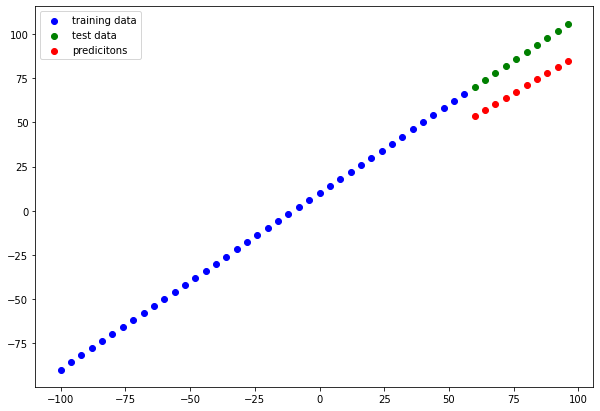

In [ ]:
#now we visualize the data for model_1
y_pred_1=model_1.predict(X_test)
plot_prediction(prediction=y_pred_1)

In [ ]:
#calculate model_1 evaluate
mae_1=mae(y_test, y_pred_1)
mse_1=mse(y_test, y_pred_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=22.782436>,
 <tf.Tensor: shape=(), dtype=float32, numpy=522.58435>)

#Build model_2

In [ ]:
#set the seed
tf.random.set_seed(42)
#build the model
model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
                           
])
#compile the model
model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["mse"])
#fit the model
model_2.fit(X_train,y_train,epochs=300)

Epoch 1/300
2/2 [==============================] - 0s 6ms/step - loss: 842.4100 - mse: 842.4100
Epoch 2/300
2/2 [==============================] - 0s 6ms/step - loss: 506.6599 - mse: 506.6599
Epoch 3/300
2/2 [==============================] - 0s 6ms/step - loss: 258.9877 - mse: 258.9877
Epoch 4/300
2/2 [==============================] - 0s 4ms/step - loss: 119.2437 - mse: 119.2437
Epoch 5/300
2/2 [==============================] - 0s 3ms/step - loss: 78.5779 - mse: 78.5779
Epoch 6/300
2/2 [==============================] - 0s 7ms/step - loss: 108.8009 - mse: 108.8009
Epoch 7/300
2/2 [==============================] - 0s 5ms/step - loss: 155.9883 - mse: 155.9883
Epoch 8/300
2/2 [==============================] - 0s 4ms/step - loss: 173.8792 - mse: 173.8792
Epoch 9/300
2/2 [==============================] - 0s 8ms/step - loss: 169.7999 - mse: 169.7999
Epoch 10/300
2/2 [==============================] - 0s 4ms/step - loss: 133.9067 - mse: 133.9067
Epoch 11/300
2/2 [=======================

array([[309.99994]], dtype=float32)

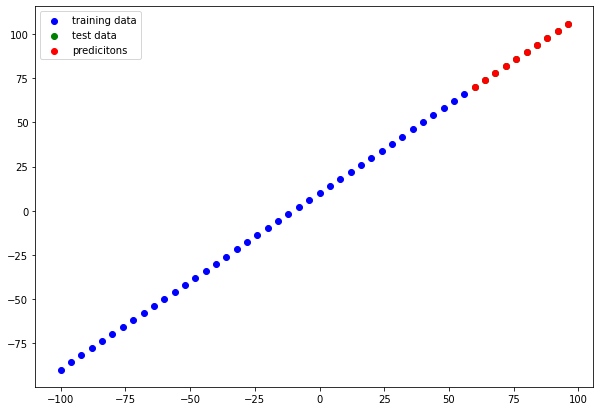

In [ ]:
#now plot the model
y_pred_2=model_2.predict(X_test)
plot_prediction(prediction=y_pred_2)
model_2.predict([300.])


In [ ]:
mae_2=mae(y_test,y_pred_2)
mse_2=mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=22.782436>,
 <tf.Tensor: shape=(), dtype=float32, numpy=522.58435>)

In [ ]:
#comparing results of experminent using Panda

import pandas as pd

model_result=[["model",mae_1.numpy(),mse_1.numpy()],
              ["model_2",mae_2.numpy(),mse_2.numpy()]]

all_reuslts=pd.DataFrame(model_result, columns=["model","mae","mse"])
all_reuslts

,model,mae,mse
0,model,22.782436,522.584351
1,model_2,22.782436,522.584351


In [ ]:
model_1.summary(),model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


(None, None)

#do your best to minimize the time between the experiment

#tracking your experiment 

being able to track your experiment reudces time between experiment and deriving results

#tensor board
a component of tf library to help modeling experiments
#weights and bias
a tool for tracking all kinds of machine learning experiments (which plug starihgt into tensor board)

# saving our model for application integration

two main formats of storing model
1. savemodel format
2. hdf5 format

In [ ]:
#save using savemodel format

model_2.save("model_2_savemodel_format")


INFO:tensorflow:Assets written to: model_2_savemodel_format/assets


In [ ]:
#the saved_model.pb is a protobuff file 
#now hierarchal data format
#hdf5 is for large data storage

model_2.save("model_2_hdf5_format.h5")

In [ ]:
#now loading the model back
loaded_savedmodel_format=tf.keras.models.load_model("/content/model_2_savemodel_format")
loaded_savedmodel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#you can remove the content/ and it'd still work
#now to confirm if it is actually the same as model_2 
#you compare using the same comparison of predicitons as well as mae

#now hdf5 formal
loaded_h5_fomat=tf.keras.models.load_model("/content/model_2_savemodel_format")
loaded_h5_fomat.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2_newpred=model_2.predict(X_test)
loaded_h5_fomat_pred=loaded_h5_fomat.predict(X_test)
model_2_newpred==loaded_h5_fomat_pred
 

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#to download  the file you can just go to files menu and down files form there
#or use code 
#save it to google drive by connecting google drive and copying it there

In [ ]:
#code to download files from colab
from google.colab import files
files.download("/content/model_2_hdf5_format.h5") #path here 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#to access cp "path to file" "path to drive"
#to see ls "path in drive"

KeyboardInterrupt: ignored

#Larger Example



In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#import req libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#read the insurance dataset
insaurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insaurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insaurance["sex"], insaurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

#we need to convert the nonumerical values into numcerical

In [ ]:
#we use one hot encoding for our catergorical data
#padas.get_dummies convert these data into categorical data

insaurance_one_hot=pd.get_dummies(insaurance)
insaurance_one_hot #top 5 rows tails for bottom 5 rows

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
#this is the shortest way of doing it
y=insaurance_one_hot["charges"]
X=insaurance_one_hot.drop("charges",axis=1)
X,y

(      age     bmi  ...  region_southeast  region_southwest
 0      19  27.900  ...                 0                 1
 1      18  33.770  ...                 1                 0
 2      28  33.000  ...                 1                 0
 3      33  22.705  ...                 0                 0
 4      32  28.880  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 1333   50  30.970  ...                 0                 0
 1334   18  31.920  ...                 0                 0
 1335   18  36.850  ...                 1                 0
 1336   21  25.800  ...                 0                 1
 1337   61  29.070  ...                 0                 0
 
 [1338 rows x 11 columns], 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Lengt


#how i did it
```
y=insaurance_one_hot["charges"]
y
y_train=y[:1138]
y_test=y[1137:]
y_train,y_test
```

#for features


```
X=insaurance_one_hot[:]
del X ["charges"] #its a dictionary type of thing basically

X_train=X[:1138]
X_test=X[1138:]
X_train,X_test
```



#you could also do 
```
X=insaurance_one_hot.drop("charges",axis=1)
```
#also know that sometimes you have  to change the data format into something that can be understood by our neural network

#another important way of creating test set is using sk learn


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(X_train),len(X_test)

(1338, 1070, 268)

In [ ]:
#set seed
tf.random.set_seed(42)
#build the model
insaurance_model=tf.keras.Sequential([
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)
])
#compile the model 
insaurance_model.compile(loss=["mae"],
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])
#fit the model
insaurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7520.6838 - mae: 7520.68

In [ ]:
#make some functions to reuse MAE and MSE for reuseability

def mae(y_true, y_test):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))
  

def mse(y_true, y_test):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred= tf.squeeze(y_pred))

In [ ]:
#lets create the plotting function
#if you feel like you're going to use some functionality in the future
#it's better to make it into a funciton

def plot_prediction(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     prediction=y_pred):
  """
  Plot training data,test data, predicitions to the ground truth labels
  """
  plt.figure(figsize=(10,7))
  #plt training data
  plt.scatter(train_data,train_labels,c="b",label="training data")
  #plt test data
  plt.scatter(test_data,test_labels,c="g",label="test data")
  #plot predicitons in red
  plt.scatter(test_data, prediction,c="r",label="predicitons")
  #show the legend
  plt.legend()

NameError: ignored

In [ ]:
insaurance_model.evaluate(X_test,y_test)
#we notice here that somehow its performing better on test data 
#start to notice patterns in how the data is beingg dealt


9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

#now we improve our model

1. add an extra layer with more hidden unit and changge optimizer

In [ ]:
tf.random.set_seed(42)
#create the model
insaurance_model_2=tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])
#adding 100 layers in top created an nan model, aka the model is too complex
#compile 
insaurance_model_2.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])
#fit
insaurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.7184 - mae:

In [ ]:
#evaluate
insaurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

2. Now with the same model, train for longer

In [ ]:
#set seed
tf.random.set_seed(42)
#create model
insaurance_model_3=tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])
#compile model
insaurance_model_3.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])
#fit model
history=insaurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [ ]:
#evaluate the mode
insaurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

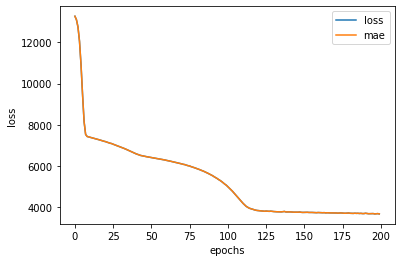

In [ ]:
#plot history (also known as loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#how long should you train for?
#it depends on t he problem
#earlystoppingcall back is used for that
#it is a tensor flow component taht you can add to your model which stops trainin when it stops improving a certain metric

#another way of pre processing gdata and (normalization and standardization) neural netwrok prefer normalization

normalization is chaning the values of the numeric columns down to a common scale, without distorting differences in the ranges of value



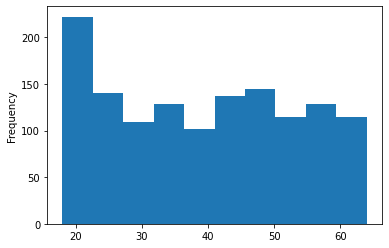

In [ ]:
X["age"].plot(kind="hist")

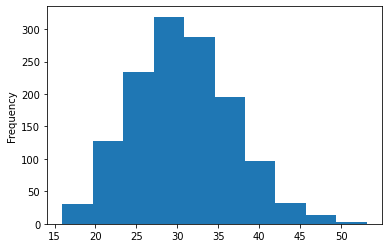

In [ ]:
X["bmi"].plot(kind="hist")

#you can notice  that the type of data is different, but what if we  wanted to change all these value between 0 and 1 that is what normalization is

typically scale features refers to normalization **we use the scikit-learn function MinMaxScalar** it converts all wvalues between 0 and 1 while preserving original distribution

**standardization scikit-learn funcntion is StandardScalar** it transforms a feature to have close to normal distribution(caution: it reduces theh effect of outliers, that means take the age graph, the effect of age 20 will be drastically reomove if you use normalize it), basicaly it removes the mean and divides each value by standard diviation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#read insaurance dataframe
insaurancne=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insaurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#now import scikit learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
#handler_uknown refers that any columns that the one hot encnoder doesn't know 
#just ignore them instead
)

#create X&y
X=insaurance.drop("charges",axis=1)
y=insaurance["charges"]

#define test and train sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#fit the column transfomer to our training data
ct.fit(X_train)
#we  only fit the train data because the test data has not been seen by the sys
#transformer training and test data with normalization (minmaxscalar) and one hotencoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [ ]:
#what does the data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

#Our  data has been normalized and one  hot encoded

In [ ]:
#no lets make our model again
tf.random.set_seed(42)
#create model
insaurance_model_4=tf.keras.Sequential([
                                        tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])
#compile
insaurance_model_4.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])
#fit model
history=insaurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.99

In [ ]:
insaurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Text(0, 0.5, 'loss')

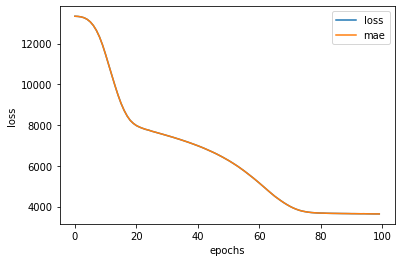

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")


#remember that normalization doesn't gaurentee reduction in mae, it's simply a metric to follow to make sure your data is precived correctly